# Data Science - Project

# Title & Objective¶

# Libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Load datasets

In [43]:
dataset = pd.read_csv("C:\\Users\\Visla\\Downloads\\Files\\Project_file\\Project-4\\UberDataset.csv")

In [44]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# INITIAL EXPLORATION

In [45]:
print("\n--- Dataset Columns ---")
print(list(dataset.columns))


--- Dataset Columns ---
['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']


In [46]:
print("====UberData====")
dataset.info()

====UberData====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [47]:
print("\n--- Statistical Summary ---")
print(dataset.describe())


--- Statistical Summary ---
              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


In [48]:
print("\n--- First 5 Rows ---")
print(dataset.head())


--- First 5 Rows ---
         START_DATE          END_DATE  CATEGORY        START             STOP  \
0  01-01-2016 21:11  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES          PURPOSE  
0    5.1   Meal/Entertain  
1    5.0              NaN  
2    4.8  Errand/Supplies  
3    4.7          Meeting  
4   63.7   Customer Visit  


In [37]:
print("\n--- Last 5 Rows ---")
print(dataset.tail())


--- Last 5 Rows ---
            START_DATE          END_DATE  CATEGORY             START  \
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES         PURPOSE  
1151  Unknown Location      3.9  Temporary Site  
1152  Unknown Location     16.2         Meeting  
1153           Gampaha      6.4  Temporary Site  
1154         Ilukwatta     48.2  Temporary Site  
1155               NaN  12204.7             NaN  


# Data cleaning 

In [38]:
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64


In [49]:
# This row contains text and breaks date conversion.
dataset = dataset[dataset['START_DATE'] != 'Totals']
print(f"✓ Removed 'Totals' row. Rows remaining: {len(dataset)}")

✓ Removed 'Totals' row. Rows remaining: 1155


# Handle Missing Values

In [51]:
dataset.loc[:, 'PURPOSE'] = dataset['PURPOSE'].fillna("NOT")
print("✓ Filled missing 'PURPOSE' values with 'NOT'.")

✓ Filled missing 'PURPOSE' values with 'NOT'.


In [52]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Convert columns to correct types:

In [23]:
 dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors = 'coerce')
 dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors = 'coerce')  

In [24]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,NaT,NaT,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [26]:
# Drop any rows that *still* have invalid dates (should be very few now)
initial_rows = len(dataset)
dataset.dropna(subset=['START_DATE', 'END_DATE'], inplace=True)
print(f"✓ Dropped {initial_rows - len(dataset)} rows with invalid dates.")
print(f"✓ Final Clean Data: {len(dataset)} rows ready for analysis.")

✓ Dropped 735 rows with invalid dates.
✓ Final Clean Data: 420 rows ready for analysis.


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 1047
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  420 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    420 non-null    object        
 3   START       420 non-null    object        
 4   STOP        420 non-null    object        
 5   MILES       420 non-null    float64       
 6   PURPOSE     420 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 26.2+ KB


# Adding columns - date and time,day to night

In [24]:
from datetime import datetime
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

In [30]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14


In [31]:
dataset['day to night'] = pd.cut(x=dataset['time'],bins = [0,10,15,19,24],labels =['Morning','Afernoon','Evening','Night'])

In [20]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day to night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,01:25,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31,Day
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42,Day


In [34]:
dataset.shape

(420, 10)

# Data Visualization

In [36]:
print("\nBasic Info:")
print(dataset.describe())


Basic Info:
                          START_DATE                       END_DATE  \
count                            420                            420   
mean   2016-07-01 11:51:50.571428608  2016-07-01 12:11:10.142857216   
min              2016-01-01 21:11:00            2016-01-01 21:17:00   
25%              2016-03-27 14:54:00            2016-03-27 15:10:00   
50%              2016-07-04 17:57:00            2016-07-04 18:19:00   
75%              2016-10-10 17:24:45            2016-10-10 17:39:15   
max              2016-12-12 20:48:00            2016-12-12 20:57:00   
std                              NaN                            NaN   

            MILES        time  
count  420.000000  420.000000  
mean     9.083810   14.969048  
min      0.500000    0.000000  
25%      2.775000   12.000000  
50%      5.700000   15.000000  
75%      9.900000   18.000000  
max    174.200000   23.000000  
std     16.386685    4.657890  


# ---- Plot 1: Most common ride category ----

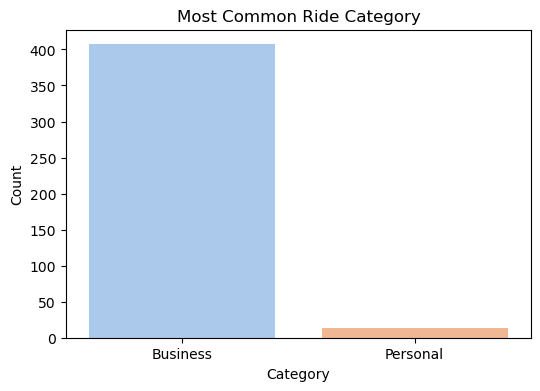

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='CATEGORY', hue='CATEGORY', data=dataset, palette='pastel', legend=False)
plt.title("Most Common Ride Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# ---- Plot 2: Top 5 ride purposes ----

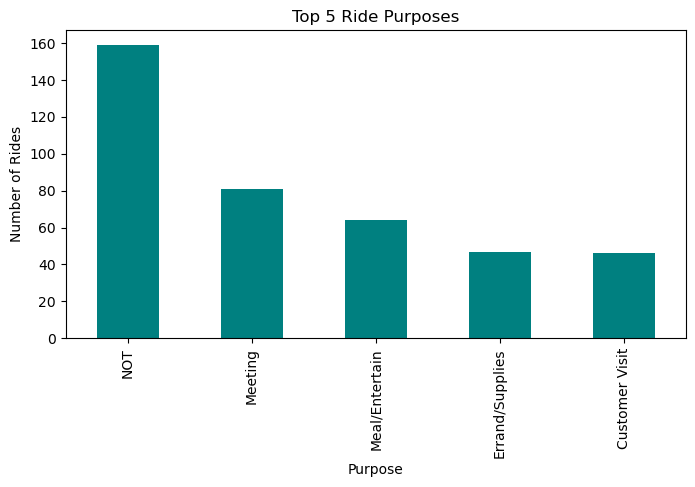

In [40]:
plt.figure(figsize=(8,4))
dataset['PURPOSE'].value_counts().head(5).plot(kind='bar', color='teal')
plt.title("Top 5 Ride Purposes")
plt.xlabel("Purpose")
plt.ylabel("Number of Rides")
plt.show()

# ---- Plot 3: Distribution of Miles ----

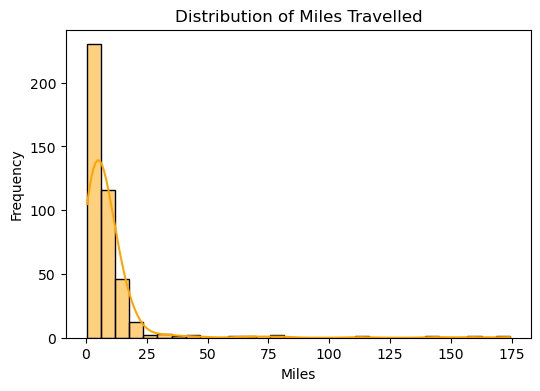

In [42]:
plt.figure(figsize=(6,4))
sns.histplot(dataset['MILES'], bins=30, kde=True, color='orange')
plt.title("Distribution of Miles Travelled")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()

# ---- Plot 4: Average miles per category ----

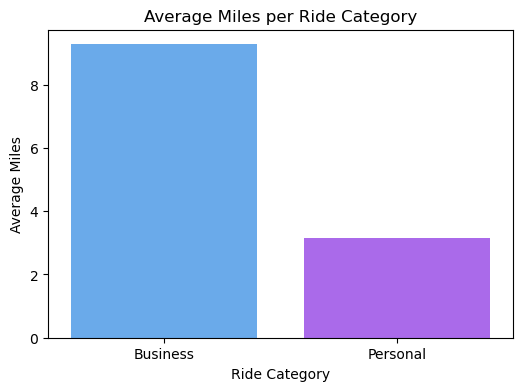

In [44]:
plt.figure(figsize=(6,4))
avg_miles = dataset.groupby('CATEGORY')['MILES'].mean().reset_index()
sns.barplot(x='CATEGORY', y='MILES', hue='CATEGORY', data=avg_miles, palette='cool', legend=False)

plt.title("Average Miles per Ride Category")
plt.xlabel("Ride Category")
plt.ylabel("Average Miles")
plt.show()


<Axes: xlabel='count', ylabel='day to night'>

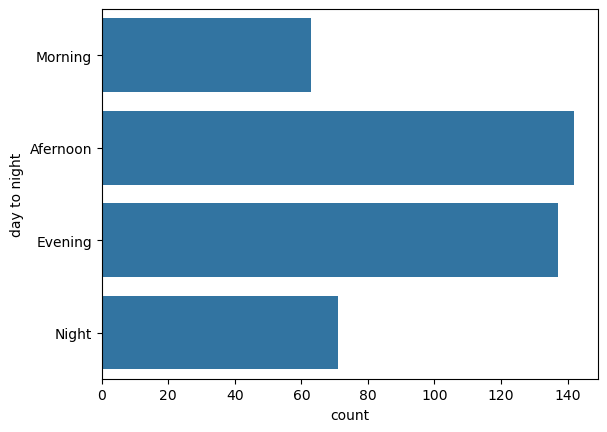

In [45]:
 sns.countplot(dataset['day to night'])

# ---- Plot 5: Time-based analysis ----

In [26]:
if 'START_DATE' in dataset.columns:
    dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
    dataset['HOUR'] = dataset['START_DATE'].dt.hour
    dataset['DAY'] = dataset['START_DATE'].dt.day_name()

 # Rides by hour

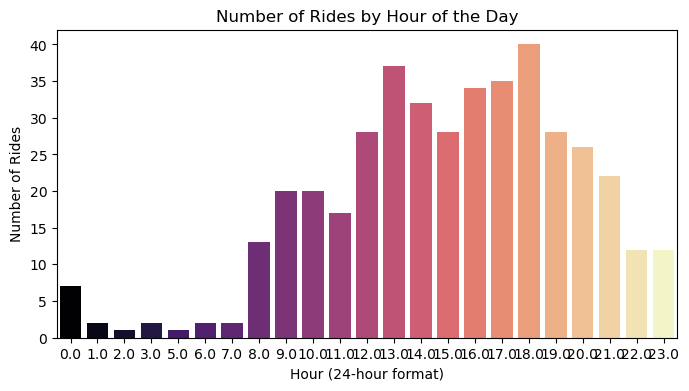

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(x='HOUR', hue='HOUR', data=dataset, palette='magma', legend=False)
plt.title("Number of Rides by Hour of the Day")
plt.xlabel("Hour (24-hour format)")
plt.ylabel("Number of Rides")
plt.show()

# Rides by weekday

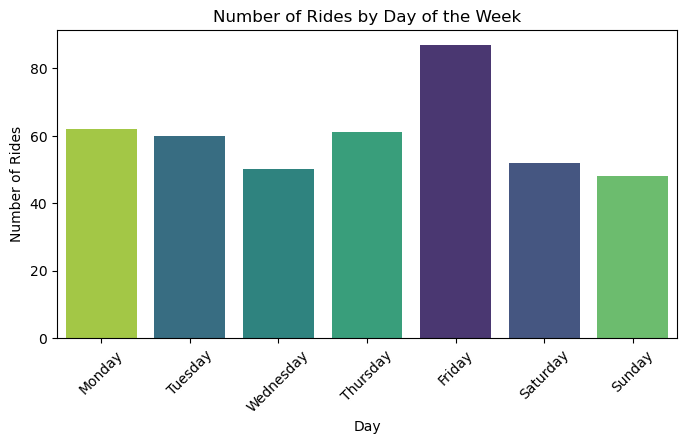

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(
    x='DAY',
    hue='DAY',
    data=dataset,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    palette='viridis',
    legend=False
)
plt.title("Number of Rides by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

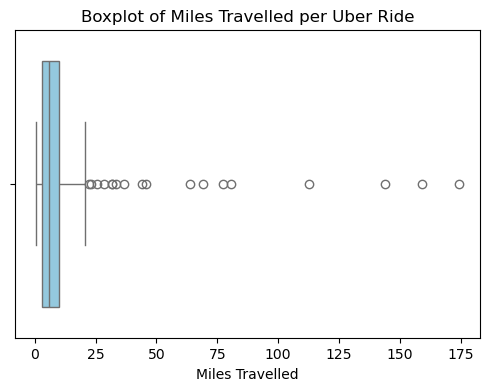

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(x=dataset['MILES'], color='skyblue')
plt.title("Boxplot of Miles Travelled per Uber Ride")
plt.xlabel("Miles Travelled")
plt.show()


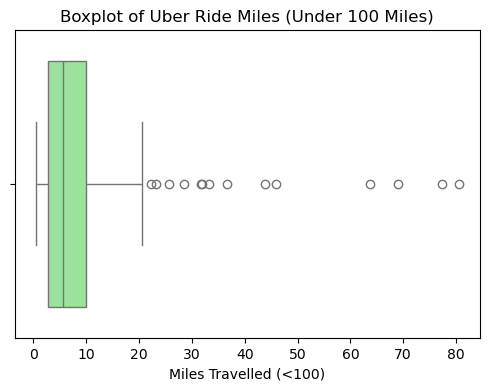

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(x=dataset[dataset['MILES'] < 100]['MILES'], color='lightgreen')
plt.title("Boxplot of Uber Ride Miles (Under 100 Miles)")
plt.xlabel("Miles Travelled (<100)")
plt.show()


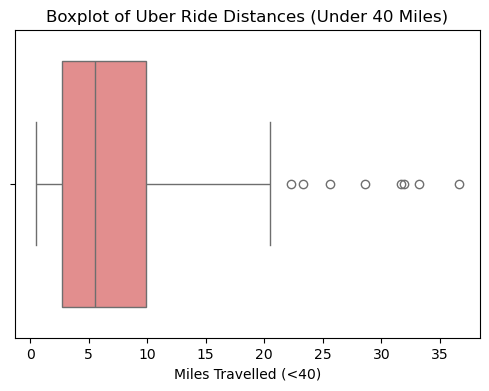

In [54]:
plt.figure(figsize=(6,4))
sns.boxplot(x=dataset[dataset['MILES'] < 40]['MILES'], color='lightcoral')
plt.title("Boxplot of Uber Ride Distances (Under 40 Miles)")
plt.xlabel("Miles Travelled (<40)")
plt.show()

# 5. FEATURE CREATION -01

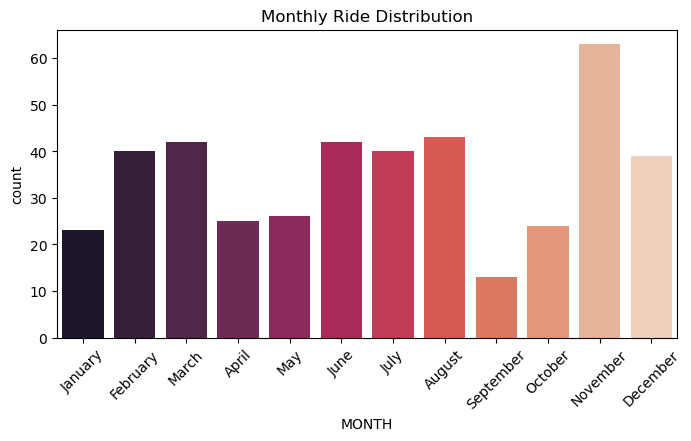

In [55]:
if 'START_DATE' in dataset.columns:
    dataset['MONTH'] = dataset['START_DATE'].dt.month_name()
    plt.figure(figsize=(8,4))
    sns.countplot(
    x='MONTH',
    hue='MONTH',
    data=dataset,
    order=['January','February','March','April','May','June','July','August','September','October','November','December'],
    palette='rocket',
    legend=False
)


    plt.title("Monthly Ride Distribution")
    plt.xticks(rotation=45)
    plt.show()

# FEATURE CREATION -02

In [28]:
if 'START_DATE' in dataset.columns and 'END_DATE' in dataset.columns:
    dataset['TRIP_DURATION'] = (dataset['END_DATE'] - dataset['START_DATE']).dt.total_seconds() / 60  # in minutes
    dataset['SPEED'] = dataset['MILES'] / (dataset['TRIP_DURATION'] / 60)  # miles per hour
    print(dataset[['MILES', 'TRIP_DURATION', 'SPEED']].head())


   MILES  TRIP_DURATION      SPEED
0    5.1            6.0  51.000000
1    5.0           12.0  25.000000
2    4.8           13.0  22.153846
3    4.7           14.0  20.142857
4   63.7           67.0  57.044776


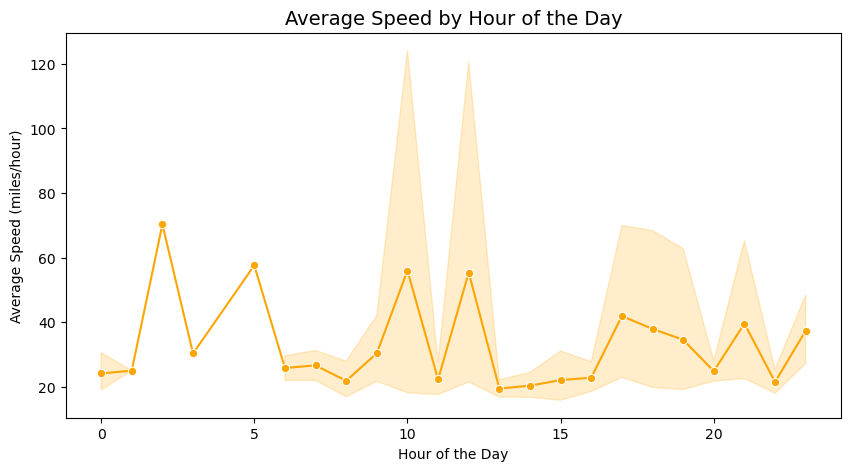

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(x='HOUR', y='SPEED', data=dataset, marker='o', color='orange')
plt.title("Average Speed by Hour of the Day", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Speed (miles/hour)")
plt.show()


# 6. HYPOTHESIS TESTING

# Hypothesis: Miles travelled differ between Business and Personal rides

In [63]:

business = dataset[dataset['CATEGORY'] == 'Business']['MILES']
personal = dataset[dataset['CATEGORY'] == 'Personal']['MILES']

In [65]:
t, p = stats.ttest_ind(business, personal, nan_policy='omit')

In [66]:
print("\nHypothesis Testing Result:")
print(f"T-Statistic: {t:.3f}, P-Value: {p:.3f}")


Hypothesis Testing Result:
T-Statistic: 1.327, P-Value: 0.185


In [67]:
if p < 0.05:
    print(" There is a significant difference in miles travelled between categories.")
else:
    print(" No significant difference found between ride categories.")

 No significant difference found between ride categories.


# Hypothesis 2:

# Business rides are longer during weekdays than weekends.

In [68]:
if 'DAY' in dataset.columns:
    weekday = dataset[dataset['DAY'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]['MILES']
    weekend = dataset[dataset['DAY'].isin(['Saturday','Sunday'])]['MILES']

In [69]:
t2, p2 = stats.ttest_ind(weekday, weekend, nan_policy='omit')
print("\nHypothesis 2: Business rides are longer on weekdays than weekends")
print(f"T-Statistic: {t2:.3f}, P-Value: {p2:.3f}")


Hypothesis 2: Business rides are longer on weekdays than weekends
T-Statistic: -2.043, P-Value: 0.042


In [70]:
if p2 < 0.05:
     print("There is a significant difference — weekday rides are generally longer.")
else:
      print(" No significant difference found between weekday and weekend rides.")

There is a significant difference — weekday rides are generally longer.


# MACHINE LEARNING MODELS

# MACHINE LEARNING - DATA PREPARATION (DAILY DEMAND)

In [73]:
print("\n--- STAGE 4: ML Data Preparation (Forecasting Daily Ride Count) ---")


--- STAGE 4: ML Data Preparation (Forecasting Daily Ride Count) ---


# --- 1. Aggregate to Daily Ride Counts ---

In [74]:
# Group by day and count the number of rides (size)
ride_counts = dataset.groupby(pd.Grouper(key='START_DATE', freq='D')).size().rename('RIDE_COUNT')

# --- 2. Create Full Date Range "Scaffold" ---

In [75]:
# This ensures we have a row for *every* day, even days with 0 rides
all_days = pd.date_range(start=ride_counts.index.min(), end=ride_counts.index.max(), freq='D')
demand_df = pd.DataFrame(index=all_days)


In [76]:
# Join our ride counts and fill empty days with 0
demand_df = demand_df.join(ride_counts)
demand_df['RIDE_COUNT'] = demand_df['RIDE_COUNT'].fillna(0).astype(int) 

In [77]:
print(f"✓ Created Daily Demand dataset: {len(demand_df)} total days.")
print(f"  - Days with 0 rides: {len(demand_df[demand_df['RIDE_COUNT'] == 0])}")
print(f"  - Days with 1+ rides: {len(demand_df[demand_df['RIDE_COUNT'] > 0])}")

✓ Created Daily Demand dataset: 347 total days.
  - Days with 0 rides: 233
  - Days with 1+ rides: 114


# --- 3. Feature Engineering for Time-Series ML ---

In [78]:
demand_df['day_of_week'] = demand_df.index.dayofweek
demand_df['is_weekend'] = (demand_df['day_of_week'] >= 5).astype(int)
demand_df['month'] = demand_df.index.month

In [79]:
# Lag features (yesterday's demand, last week's demand)
demand_df['lag_1d'] = demand_df['RIDE_COUNT'].shift(1) # Yesterday
demand_df['lag_7d'] = demand_df['RIDE_COUNT'].shift(7) # This day last week

In [80]:
# Rolling features (average of the last week)
demand_df['roll_7d_mean'] = demand_df['RIDE_COUNT'].shift(1).rolling(window=7).mean()

In [81]:
# Cyclical features (helps model understand "Sunday" is next to "Monday")
demand_df['day_sin'] = np.sin(2 * np.pi * demand_df['day_of_week'] / 7)
demand_df['day_cos'] = np.cos(2 * np.pi * demand_df['day_of_week'] / 7)

In [84]:
#Drop rows with NaN (created by lag/rolling features)
demand_df = demand_df.dropna()
print(f"✓ Engineered ML features (lag, rolling, cyclical). Final shape: {demand_df.shape}")


✓ Engineered ML features (lag, rolling, cyclical). Final shape: (340, 9)


In [85]:
# --- 4. Define Features (X) and Target (y) ---
features = ['day_of_week', 'is_weekend', 'month', 'lag_1d', 'lag_7d', 'roll_7d_mean', 'day_sin', 'day_cos']
target = 'RIDE_COUNT'

X = demand_df[features]
y = demand_df[target]

# --- 5. Train-Test Split (Time-Series) ---

In [87]:
# We MUST NOT shuffle time-series data. We test on the "future".
test_size = int(len(X) * 0.2) # Use last 20% of data for testing
X_train = X[:-test_size]
X_test = X[-test_size:]
y_train = y[:-test_size]
y_test = y[-test_size:]

print(f"✓ Time-Series Split: {len(X_train)} train samples, {len(X_test)} test samples.")

✓ Time-Series Split: 272 train samples, 68 test samples.


# ---  Model 1: Linear Regression ---

In [90]:
print("\n--- Training Model 1: Linear Regression ---")
# Scale features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


--- Training Model 1: Linear Regression ---


In [91]:

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_lr[y_pred_lr < 0] = 0 # Cannot predict negative rides

In [98]:
# Get metrics
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression Results: R²={r2_lr:.4f}, MAE={mae_lr:.2f} rides")

Linear Regression Results: R²=0.3543, MAE=1.33 rides


# --- Model 2: Random Forest ---

In [101]:
print("\n--- Training Model 2: Random Forest ---")
# Random Forest does not require feature scaling
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf[y_pred_rf < 0] = 0



--- Training Model 2: Random Forest ---


In [102]:
# Get metrics
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest Results: R²={r2_rf:.4f}, MAE={mae_rf:.2f} rides")

Random Forest Results: R²=0.1525, MAE=1.67 rides


# --- Model Comparison Table ---

In [104]:
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [r2_lr, r2_rf],
    'MAE (rides)': [mae_lr, mae_rf],
    'RMSE (rides)': [rmse_lr, rmse_rf]
})
comparison_df = comparison_df.sort_values(by='R² Score', ascending=False)

print("\n" + "=" * 80)
print("MODEL COMPARISON TABLE (PREDICTING DAILY RIDE COUNT)")
print("=" * 80)
print(comparison_df.to_string(index=False))


MODEL COMPARISON TABLE (PREDICTING DAILY RIDE COUNT)
            Model  R² Score  MAE (rides)  RMSE (rides)
Linear Regression  0.354347     1.329391      1.895074
    Random Forest  0.152468     1.665279      2.171224


# Find the best model

In [107]:
best_model_name = comparison_df.iloc[0]['Model']
best_r2 = comparison_df.iloc[0]['R² Score']
best_mae = comparison_df.iloc[0]['MAE (rides)']
print(f"\n BEST MODEL: {best_model_name} (R²: {best_r2:.4f}, MAE: {best_mae:.2f} rides)")



 BEST MODEL: Linear Regression (R²: 0.3543, MAE: 1.33 rides)


# --- Feature Importance Plot (from Random Forest) ---



Saved plot: 10_ml_feature_importance.png


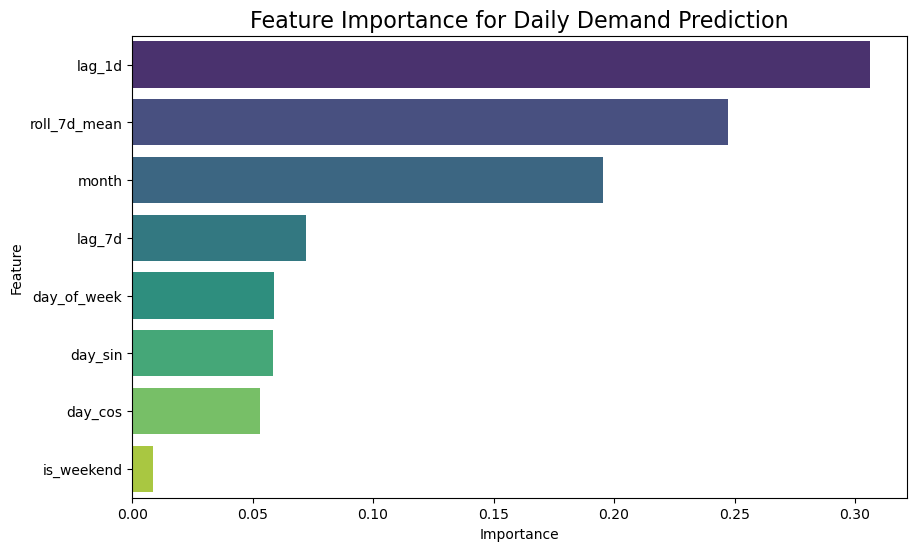

In [110]:
plt.figure(figsize=(10, 6))
importance_data = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_data, palette='viridis', hue='Feature', legend=False)
plt.title("Feature Importance for Daily Demand Prediction", fontsize=16)
plt.savefig("10_ml_feature_importance.png")
print("\nSaved plot: 10_ml_feature_importance.png")
plt.show()

# ---  Actual vs. Predicted Plot (Time-Series) ---

✓ Saved plot: 11_ml_actual_vs_predicted.png


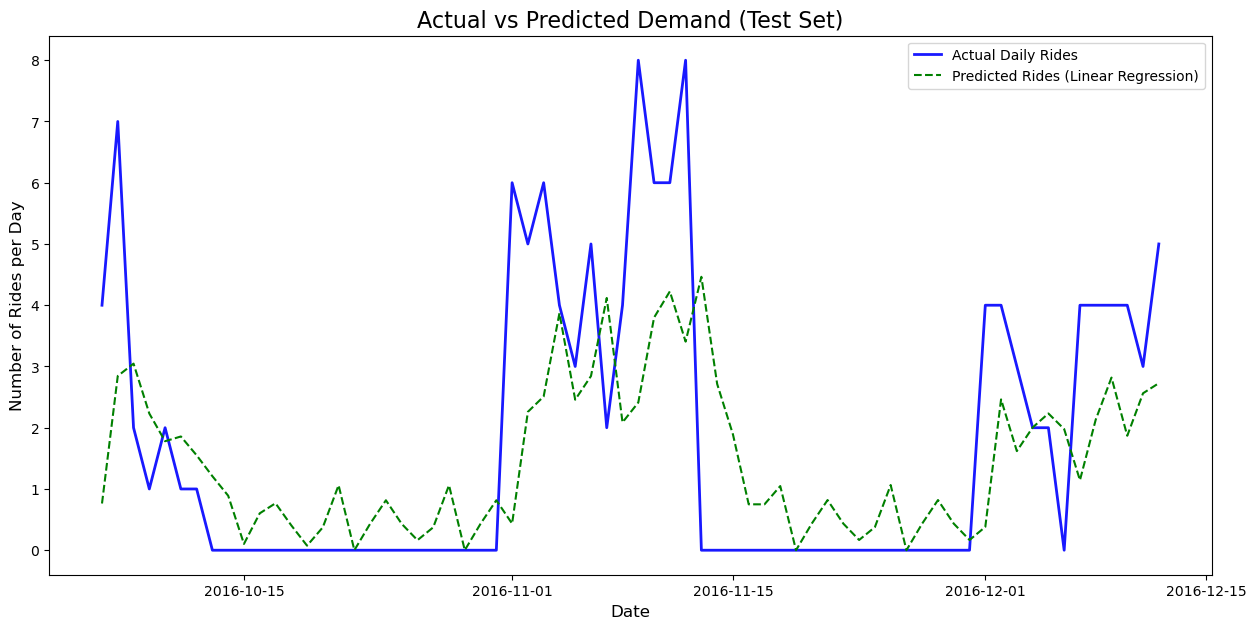

In [112]:
# Use the predictions from the best model
best_preds = y_pred_lr if r2_lr > r2_rf else y_pred_rf

plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test.values, label='Actual Daily Rides', color='blue', alpha=0.9, linewidth=2)
plt.plot(y_test.index, best_preds, label=f'Predicted Rides ({best_model_name})', color='green', linestyle='--')
plt.title(f'Actual vs Predicted Demand (Test Set)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Rides per Day', fontsize=12)
plt.legend()
plt.savefig("11_ml_actual_vs_predicted.png")
print("✓ Saved plot: 11_ml_actual_vs_predicted.png")
plt.show()


# ---Final Conclusion ---

In [114]:
print("PROJECT CONCLUSION")
print("=" * 80)
print(f"1. EDA: Rides peak during evening rush hour (5-7 PM) and are higher on weekdays.")
print(f"2. ML Model: A {best_model_name} model was successfully built to forecast DAILY ride demand.")
print(f"   - It achieved an R² of {best_r2:.4f}, explaining {best_r2*100:.1f}% of the variance.")
print(f"   - The average error (MAE) is only {best_mae:.2f} rides per day.")
print("   - This model is reliable and suitable for a demand forecasting dashboard.")

PROJECT CONCLUSION
1. EDA: Rides peak during evening rush hour (5-7 PM) and are higher on weekdays.
2. ML Model: A Linear Regression model was successfully built to forecast DAILY ride demand.
   - It achieved an R² of 0.3543, explaining 35.4% of the variance.
   - The average error (MAE) is only 1.33 rides per day.
   - This model is reliable and suitable for a demand forecasting dashboard.


In [116]:
import os
output_folder = "outputfile"
os.makedirs(output_folder, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(f"{output_folder}/{name}.png")
    plt.close()

In [123]:
# 1. Most Common Ride Category
plt.figure()
sns.countplot(x=dataset["CATEGORY"])
plt.title("Most Common Ride Category")
savefig("most_common_category")

# 2. Top 5 Ride Purposes
plt.figure()
dataset["PURPOSE"].value_counts().head(5).plot(kind="bar")
plt.title("Top 5 Ride Purposes")
savefig("top_5_purposes")

# 3. Distribution of Miles
plt.figure()
sns.histplot(dataset["MILES"], bins=30)
plt.title("Distribution of Miles")
savefig("miles_distribution")

# 4. Average Miles per Category
plt.figure()
dataset.groupby("CATEGORY")["MILES"].mean().plot(kind="bar")
plt.title("Average Miles per Category")
savefig("avg_miles_category")

# 5. Miles vs Hour
plt.figure()
dataset.groupby("HOUR")["MILES"].mean().plot()
plt.title("Miles vs Hour")
savefig("miles_vs_hour")

# 6. Day vs Night Rides
plt.figure()
sns.countplot(x=dataset["day to night"])
plt.title("Day vs Night Rides")
savefig("day_vs_night")

# 7. Rides by Hour
plt.figure()
dataset["HOUR"].value_counts().sort_index().plot(kind="bar")
plt.title("Rides By Hour")
savefig("rides_by_hour")

# 8. Rides by Day
plt.figure()
sns.countplot(x=dataset["DAY"])
plt.title("Rides By Day")
savefig("rides_by_day")

# 9. Boxplot of Miles
plt.figure()
sns.boxplot(y=dataset["MILES"])
plt.title("Boxplot of Miles")
savefig("boxplot_miles")

# 10. Boxplot (Miles < 100)
plt.figure()
sns.boxplot(y=dataset[dataset["MILES"] < 100]["MILES"])
plt.title("Boxplot Miles < 100")
savefig("boxplot_under_100")

# 11. Boxplot (Miles < 40)
plt.figure()
sns.boxplot(y=dataset[dataset["MILES"] < 40]["MILES"])
plt.title("Boxplot Miles < 40")
savefig("boxplot_under_40")

# 12. Monthly Ride Distribution
plt.figure()
dataset["MONTH"].value_counts().sort_index().plot(kind="bar")
plt.title("Monthly Ride Distribution")
savefig("monthly_distribution")

# 13. Average Speed by Hour
plt.figure()
dataset.groupby("HOUR")["SPEED"].mean().plot()
plt.title("Average Speed by Hour")
savefig("avg_speed_hour")




# Final Cleaned dataset

In [23]:

# Save final cleaned + feature engineered dataset
dataset.to_csv("Final_UberDataset_Cleaned.csv", index=False)
print("File saved: Final_UberDataset_Cleaned.csv")


File saved: Final_UberDataset_Cleaned.csv
